In [2]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt 

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from img_to_matrix import X_train, X_test, y_train, y_test, load_images_from_folder

In [94]:
# On redimensionne les images pour notre réseau de neurones
X_train = X_train.reshape(-1, 100, 100, 1)
X_test = X_test.reshape(-1, 100, 100, 1)

Voici notre modèle retenu :

In [95]:
model = keras.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2))

On utiliser 3 couches de `Conv2D` avec des `MaxPooling2D`.

In [96]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 21, 21, 256)       295168    
_________________________________________________________________
flatten_9 (Flatten)          (None, 112896)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)             

In [97]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [98]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
42/42 [==============================] - 18s 430ms/step - loss: 172.3273 - accuracy: 0.5768 - val_loss: 0.8134 - val_accuracy: 0.6598
Epoch 2/10
42/42 [==============================] - 19s 452ms/step - loss: 0.7167 - accuracy: 0.7277 - val_loss: 0.6982 - val_accuracy: 0.6443
Epoch 3/10
42/42 [==============================] - 19s 453ms/step - loss: 0.4525 - accuracy: 0.7922 - val_loss: 0.5199 - val_accuracy: 0.7526
Epoch 4/10
42/42 [==============================] - 19s 461ms/step - loss: 0.2808 - accuracy: 0.8926 - val_loss: 0.4868 - val_accuracy: 0.7680
Epoch 5/10
42/42 [==============================] - 19s 454ms/step - loss: 0.1885 - accuracy: 0.9265 - val_loss: 0.5442 - val_accuracy: 0.8041
Epoch 6/10
42/42 [==============================] - 19s 454ms/step - loss: 0.1918 - accuracy: 0.9238 - val_loss: 0.3958 - val_accuracy: 0.7990
Epoch 7/10
42/42 [==============================] - 19s 449ms/step - loss: 0.1458 - accuracy: 0.9448 - val_loss: 0.4355 - val_accuracy: 0.84

In [99]:
pred = model.predict_classes(X_test)

In [100]:
conf = confusion_matrix(y_test, pred)

<AxesSubplot:>

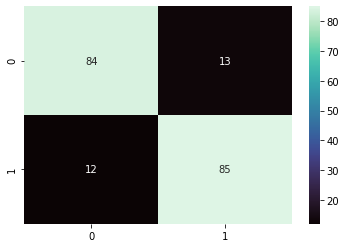

In [101]:
sns.heatmap(conf, cmap='mako', annot=True, fmt='d')

In [102]:
model.save('mask_model')

INFO:tensorflow:Assets written to: mask_model/assets
